#Demo
Showcases the structure of key points from c3d file after cleaning in three dimentions.

Key point count: 39 x 3 dim

In [518]:
# verify if GPU is available
import tensorflow as tf
from tensorflow.python.client import device_lib

print("GPUs Available: ", (tf.test.is_gpu_available()))

GPUs Available:  True


In [519]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [520]:
recording = pd.read_csv("data/samples/healthy/train/recording_03/recording_key_points.csv", header = 0, low_memory=False)

In [521]:
recording.shape

(1728, 1147)

In [522]:
recording.head()

,Time,LFHD,Unnamed: 2,Unnamed: 3,RFHD,Unnamed: 5,Unnamed: 6,LBHD,Unnamed: 8,Unnamed: 9,RBHD,Unnamed: 11,Unnamed: 12,C7,Unnamed: 14,Unnamed: 15,T10,Unnamed: 17,Unnamed: 18,CLAV,Unnamed: 20,Unnamed: 21,STRN,Unnamed: 23,Unnamed: 24,RBAK,Unnamed: 26,Unnamed: 27,LSHO,Unnamed: 29,Unnamed: 30,LUPA,Unnamed: 32,Unnamed: 33,LELB,Unnamed: 35,Unnamed: 36,LFRM,Unnamed: 38,Unnamed: 39,LWRA,Unnamed: 41,Unnamed: 42,LWRB,Unnamed: 44,Unnamed: 45,LFIN,Unnamed: 47,Unnamed: 48,RSHO,Unnamed: 50,Unnamed: 51,RUPA,Unnamed: 53,Unnamed: 54,RELB,Unnamed: 56,Unnamed: 57,RFRM,Unnamed: 59,Unnamed: 60,RWRA,Unnamed: 62,Unnamed: 63,RWRB,Unnamed: 65,Unnamed: 66,RFIN,Unnamed: 68,Unnamed: 69,LASI,Unnamed: 71,Unnamed: 72,RASI,Unnamed: 74,Unnamed: 75,LPSI,Unnamed: 77,Unnamed: 78,RPSI,Unnamed: 80,Unnamed: 81,LTHI,Unnamed: 83,Unnamed: 84,LKNE,Unnamed: 86,Unnamed: 87,LTIB,Unnamed: 89,Unnamed: 90,LANK,Unnamed: 92,Unnamed: 93,LHEE,Unnamed: 95,Unnamed: 96,LTOE,Unnamed: 98,Unnamed: 99,RTHI,Unnamed: 101,Unnamed: 102,RKNE,Unnamed: 104,Unnamed: 105,RTIB,Unnamed: 107,Unnamed: 108,RANK,Unnamed: 110,Unnamed: 111,RHEE,Unnamed: 113,Unnamed: 114,RTOE,Unnamed: 116,Unnamed: 117,LFHD_2,Unnamed: 119,Unnamed: 120,RFHD_2,Unnamed: 122,Unnamed: 123,LBHD_2,Unnamed: 125,Unnamed: 126,RBHD_2,Unnamed: 128,Unnamed: 129,C7_2,Unnamed: 131,Unnamed: 132,T10_2,Unnamed: 134,Unnamed: 135,CLAV_2,Unnamed: 137,Unnamed: 138,STRN_2,Unnamed: 140,Unnamed: 141,RBAK_2,Unnamed: 143,Unnamed: 144,LSHO_2,Unnamed: 146,Unnamed: 147,LUPA_2,Unnamed: 149,Unnamed: 150,LELB_2,Unnamed: 152,Unnamed: 153,LFRM_2,Unnamed: 155,Unnamed: 156,LWRA_2,Unnamed: 158,Unnamed: 159,LWRB_2,Unnamed: 161,Unnamed: 162,LFIN_2,Unnamed: 164,Unnamed: 165,RSHO_2,Unnamed: 167,Unnamed: 168,RUPA_2,Unnamed: 170,Unnamed: 171,RELB_2,Unnamed: 173,Unnamed: 174,RFRM_2,Unnamed: 176,Unnamed: 177,RWRA_2,Unnamed: 179,Unnamed: 180,RWRB_2,Unnamed: 182,Unnamed: 183,RFIN_2,Unnamed: 185,Unnamed: 186,LASI_2,Unnamed: 188,Unnamed: 189,RASI_2,Unnamed: 191,Unnamed: 192,LPSI_2,Unnamed: 194,Unnamed: 195,RPSI_2,Unnamed: 197,Unnamed: 198,LTHI_2,Unnamed: 200,Unnamed: 201,LKNE_2,Unnamed: 203,Unnamed: 204,LTIB_2,Unnamed: 206,Unnamed: 207,LANK_2,Unnamed: 209,Unnamed: 210,LHEE_2,Unnamed: 212,Unnamed: 213,LTOE_2,Unnamed: 215,Unnamed: 216,RTHI_2,Unnamed: 218,Unnamed: 219,RKNE_2,Unnamed: 221,Unnamed: 222,RTIB_2,Unnamed: 224,Unnamed: 225,RANK_2,Unnamed: 227,Unnamed: 228,RHEE_2,Unnamed: 230,Unnamed: 231,RTOE_2,Unnamed: 233,Unnamed: 234,PELO_2,Unnamed: 236,Unnamed: 237,PELA_2,Unnamed: 239,Unnamed: 240,PELL_2,Unnamed: 242,Unnamed: 243,PELP_2,Unnamed: 245,Unnamed: 246,LFEO_2,Unnamed: 248,Unnamed: 249,LFEA_2,Unnamed: 251,Unnamed: 252,LFEL_2,Unnamed: 254,Unnamed: 255,LFEP_2,Unnamed: 257,Unnamed: 258,LTIO_2,Unnamed: 260,Unnamed: 261,LTIA_2,Unnamed: 263,Unnamed: 264,LTIL_2,Unnamed: 266,Unnamed: 267,LTIP_2,Unnamed: 269,Unnamed: 270,LFOO_2,Unnamed: 272,Unnamed: 273,LFOA_2,Unnamed: 275,Unnamed: 276,LFOL_2,Unnamed: 278,Unnamed: 279,LFOP_2,Unnamed: 281,Unnamed: 282,LTOO_2,Unnamed: 284,Unnamed: 285,LTOA_2,Unnamed: 287,Unnamed: 288,LTOL_2,Unnamed: 290,Unnamed: 291,LTOP_2,Unnamed: 293,Unnamed: 294,RFEO_2,Unnamed: 296,Unnamed: 297,RFEA_2,Unnamed: 299,Unnamed: 300,RFEL_2,Unnamed: 302,Unnamed: 303,RFEP_2,Unnamed: 305,Unnamed: 306,RTIO_2,Unnamed: 308,Unnamed: 309,RTIA_2,Unnamed: 311,Unnamed: 312,RTIL_2,Unnamed: 314,Unnamed: 315,RTIP_2,Unnamed: 317,Unnamed: 318,RFOO_2,Unnamed: 320,Unnamed: 321,RFOA_2,Unnamed: 323,Unnamed: 324,RFOL_2,Unnamed: 326,Unnamed: 327,RFOP_2,Unnamed: 329,Unnamed: 330,RTOO_2,Unnamed: 332,Unnamed: 333,RTOA_2,Unnamed: 335,Unnamed: 336,RTOL_2,Unnamed: 338,Unnamed: 339,RTOP_2,Unnamed: 341,Unnamed: 342,HEDO_2,Unnamed: 344,Unnamed: 345,HEDA_2,Unnamed: 347,Unnamed: 348,HEDL_2,Unnamed: 350,Unnamed: 351,HEDP_2,Unnamed: 353,Unnamed: 354,LCLO_2,Unnamed: 356,Unnamed: 357,LCLA_2,Unnamed: 359,Unnamed: 360,LCLL_2,Unnamed: 362,Unnamed: 363,LCLP_2,Unnamed: 365,Unnamed: 366,RCLO_2,Unnamed: 368,Unnamed: 369,RCLA_2,Unnamed: 371,Unnamed: 372,RCLL_2,Unnamed: 374,Unnamed: 375,RCLP_2,Unnamed: 377,Unnam

In [523]:
def structurize_df(recording):
  suffices = ['X', 'Y', 'Z']
  columns = recording.columns[1::3]
  mappings = {col: f'{columns[i//3]}_{suffices[i%3]}' for i, col in enumerate(recording.columns[1:])}
  recording = recording.rename(columns=mappings)
  df = recording.iloc[2:, 1:118].reset_index(drop=True)
  return df

In [524]:
df = structurize_df(recording)

In [525]:
df.shape

(1726, 117)

In [526]:
df[:10]

,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,LBHD_Z,RBHD_X,RBHD_Y,RBHD_Z,C7_X,C7_Y,C7_Z,T10_X,T10_Y,T10_Z,CLAV_X,CLAV_Y,CLAV_Z,STRN_X,STRN_Y,STRN_Z,RBAK_X,RBAK_Y,RBAK_Z,LSHO_X,LSHO_Y,LSHO_Z,LUPA_X,LUPA_Y,LUPA_Z,LELB_X,LELB_Y,LELB_Z,LFRM_X,LFRM_Y,LFRM_Z,LWRA_X,LWRA_Y,LWRA_Z,LWRB_X,LWRB_Y,LWRB_Z,LFIN_X,LFIN_Y,LFIN_Z,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,RELB_Z,RFRM_X,RFRM_Y,RFRM_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z,LASI_X,LASI_Y,LASI_Z,RASI_X,RASI_Y,RASI_Z,LPSI_X,LPSI_Y,LPSI_Z,RPSI_X,RPSI_Y,RPSI_Z,LTHI_X,LTHI_Y,LTHI_Z,LKNE_X,LKNE_Y,LKNE_Z,LTIB_X,LTIB_Y,LTIB_Z,LANK_X,LANK_Y,LANK_Z,LHEE_X,LHEE_Y,LHEE_Z,LTOE_X,LTOE_Y,LTOE_Z,RTHI_X,RTHI_Y,RTHI_Z,RKNE_X,RKNE_Y,RKNE_Z,RTIB_X,RTIB_Y,RTIB_Z,RANK_X,RANK_Y,RANK_Z,RHEE_X,RHEE_Y,RHEE_Z,RTOE_X,RTOE_Y,RTOE_Z
0,143.795,-13.9034,1531.34,35.1805,-12.5715,1522.76,165.321,145.909,1470.9,21.0565,133.098,1455.17,91.3944,149.567,1310.25,80.2465,126.869,1049.35,100.66,22.6587,1284.91,100.327,-61.6976,1084.37,16.4667,166.187,1237.95,213.365,115.76,1317.04,385.105,108.326,1264.97,506.463,75.6292,1261.84,596.249,63.5097,1268.73,733.84,-11.1581,1308.24,731.56,43.745,1296.06,792.746,18.4816,1311.45,-18.9354,109.699,1319.31,-216.534,92.0409,1287.54,-317.966,63.0007,1304.54,-443.893,42.0234,1317.61,-530.204,-33.8838,1358.51,-537.875,14.4426,1363.88,-604.291,-22.611,1359.39,220.091,-15.5283,896.852,-21.708,-35.592,905.689,124.206,119.506,963.821,40.1056,113.018,959.578,244.475,79.0581,639.126,215.636,114.413,423.562,219.41,137.485,243.693,199.818,119.88,58.5256,152.475,161.448,43.9367,198.798,-35.0042,44.9199,-62.0196,77.6102,554.006,-59.0153,98.6915,419.29,-57.4044,102.142,195.338,-44.8493,82.085,68.7561,-11.5442,137.687,43.7875,14.8721,-51.836,47.4976
1,143.79,-13.9849,1531.5,35.1544,-12.7151,1522.89,165.303,145.775,1470.9,21.0198,132.871,1455.17,91.3641,149.289,1310.29,80.2168,126.777,1049.44,100.632,22.4432,1284.93,100.306,-61.8112,1084.33,16.4146,165.986,1238.07,213.271,115.548,1317.13,385.078,108.178,1265.21,506.445,75.5459,1262.22,596.242,63.4287,1269.16,733.807,-11.2297,1308.93,731.519,43.682,1296.71,792.698,18.4226,1312.22,-18.9132,109.465,1319.38,-216.523,91.7662,1287.82,-317.938,62.7452,1304.93,-443.849,41.6578,1318.18,-530.069,-34.2637,1359.25,-537.755,14.0538,1364.65,-604.141,-23.0265,1360.31,220.041,-15.5962,896.843,-21.7501,-35.4791,905.699,124.241,119.458,963.889,40.1392,113.045,959.634,244.441,79.0657,639.141,215.601,114.416,423.572,219.385,137.492,243.691,199.81,119.878,58.5084,152.477,161.461,43.9347,198.803,-35.0053,44.9294,-61.9914,77.5675,554.014,-58.9815,98.5988,419.296,-57.3692,102.087,195.327,-44.8434,82.0766,68.7556,-11.545,137.682,43.7912,14.8869,-51.8772,47.4895
2,143.778,-14.0717,1531.64,35.1242,-12.8584,1523,165.28,145.643,1470.9,20.9801,132.652,1455.17,91.3275,149.025,1310.33,80.1793,126.681,1049.52,100.6,22.2375,1284.94,100.281,-61.9259,1084.29,16.3568,165.791,1238.18,213.174,115.348,1317.21,385.041,108.041,1265.44,506.419,75.4672,1262.58,596.225,63.3546,1269.57,733.763,-11.2859,1309.59,731.47,43.63,1297.34,792.639,18.3806,1312.96,-18.9036,109.236,1319.43,-216.522,91.5079,1288.07,-317.925,62.5058,1305.29,-443.818,41.3211,1318.72,-529.947,-34.6223,1359.95,-537.651,13.6827,1365.37,-604.008,-23.4282,1361.16,219.989,-15.6674,896.834,-21.7935,-35.3891,905.704,124.264,119.404,963.954,40.1605,113.054,959.688,244.405,79.0616,639.155,215.566,114.411,423.581,219.359,137.491,243.69,199.801,119.875,58.4957,152.477,161.471,43.9334,198.81,-35.0037,44.9373,-61.9699,77.5278,554.021,-58.9539,98.5156,419.302,-57.3381,102.044,195.319,-44.8384,82.0686,68.7548,-11.5464,137.676,43.7944,14.9001,-51.9072,47.4829
3,143.759,-14.1636,1531.76,35.0899,-13.0015,1523.11,165.252,145.513,1470.89,20.9375,132.443,1455.16,91.2845,148.772,1310.35,80.134,126.58,1049.58,100.564,22.0417,1284.94,100.253,-62.042,1084.25,16.2933,165.602,1238.27,213.075,115.159,1317.28,384.995,107.913,1265.64,506.385,75.3933,1262.92,596.198,63.2873,1269.96,733.709,-11.3269,1310.24

In [527]:
!pip install plotly
!pip install kaleido

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [528]:
# import plotly.graph_objects as go
# fig= go.Figure(go.Scatter3d(x=point_cloud[200,:, 0],
#                                 y=point_cloud[200,:, 1],
#                                 z=point_cloud[200,:, 2]))
# fig.write_html("data/visualisation/fig1.html")

#Preprocessing

In [529]:
import glob 
import os
import sys
import numpy as np
from pathlib import Path

MAX_FRAMES = 5000
DATA_DIR = "data"
POINTS = 39 
DIM = 3

def structurize_df(recording: pd.DataFrame) -> pd.DataFrame:
    '''Converts raw dataset into clean dataset 
         Args:
              - recording: pd.Dataframe -> (n_frames, 574)
         Returns:
              - df_clean: pd.Dataframe -> (n_frames, 117)
    '''
    suffices = ['X', 'Y', 'Z']
    columns = recording.columns[1::3]
    mappings = {col: f'{columns[i//3]}_{suffices[i%3]}' for i, col in enumerate(recording.columns[1:])}
    recording = recording.rename(columns=mappings)
    df_clean = recording.iloc[2:, 1:118].reset_index(drop=True)
    return df_clean


def convert_2_array(df: pd.DataFrame, max_frames = MAX_FRAMES, points = POINTS, dim = DIM) -> np.array:
    '''Converts clean dataset into
         Args:
              - df: (n_frames, 117) 
              - max_frames: MAX_FRAMES 
              - points: POINTS
              - dim: DIM 
         Returns:
              - point_cloud: np.array -> (n_frames, n_points, n_dim)
    '''
    pre_point_cloud = df.to_numpy().astype(float)
    frames = pre_point_cloud.shape[0]
    point_cloud_full = np.reshape(pre_point_cloud, (frames, points, dim)) # (1545, 39, 3)
    point_cloud = point_cloud_full[:max_frames] # limit to max threshold
    return point_cloud


def introduce_distortion(point_cloud: np.array) -> np.array:
    '''Converts clean dataset into
         Args:
              - point_cloud: origin -> (n_frames, n_points, n_dim)
         Returns:
              - point_cloud: distorted -> (n_frames, n_points, n_dim)
    '''
    point_cloud+= tf.random.uniform(point_cloud.shape, 40, 50, dtype=tf.float64)
    return point_cloud


def parse_dataset():
    '''Converts source files (c3d transitioned into csv) into train & test dataset
         Returns:
              - (train_points, train_labels, classes): tuple(np.array, np.array, list) -> ((n_samples, n_frames, n_points, n_dim), (n_samples,), (n_classes))
    '''
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    point_cloud = []
    classes = glob.glob("data/samples/*", recursive = True)

    for label, folder in enumerate(classes): # healthy, AD, PD
        print("Currently processing class: {}".format(os.path.basename(folder)))

        train_folders = glob.glob(os.path.join(folder, "train/*")) # recording_01 etc.
        test_folders = glob.glob(os.path.join(folder, "test/*"))

        for f in train_folders: # recording_01 etc.
            train_file = glob.glob(os.path.join(f, "recording_key_points.csv"))
            print("\n", train_file)
            recording = pd.read_csv(train_file[0], header = 0, low_memory=False)
            df = structurize_df(recording)
            point_cloud = convert_2_array(df)

            # temporarily introduce distortion to simulate disorder => remove once actual AD/PD data received 
            # if label!=0:
            #   point_cloud = introduce_distortion(point_cloud)

            train_points.append(point_cloud)
            train_labels.append(label)

        for f in test_folders:
            test_file = glob.glob(os.path.join(f, "recording_key_points.csv"))
            print("\n", test_file)
            recording = pd.read_csv(test_file[0], header = 0)
            df = structurize_df(recording)
            point_cloud = convert_2_array(df)

            test_points.append(point_cloud)
            test_labels.append(label)

    return (np.array(train_points), np.array(train_labels), np.array(test_points), np.array(test_labels), classes)

In [530]:
train_points, train_labels, test_points, test_labels, classes = parse_dataset()

Currently processing class: healthy

 ['data/samples/healthy/train/recording_01/recording_key_points.csv']

 ['data/samples/healthy/train/recording_02/recording_key_points.csv']

 ['data/samples/healthy/train/recording_03/recording_key_points.csv']

 ['data/samples/healthy/train/recording_04/recording_key_points.csv']

 ['data/samples/healthy/train/recording_05/recording_key_points.csv']

 ['data/samples/healthy/train/recording_06/recording_key_points.csv']

 ['data/samples/healthy/test/recording_01/recording_key_points.csv']

 ['data/samples/healthy/test/recording_02/recording_key_points.csv']

 ['data/samples/healthy/test/recording_03/recording_key_points.csv']
Currently processing class: PD

 ['data/samples/PD/train/recording_01/recording_key_points.csv']

 ['data/samples/PD/train/recording_02/recording_key_points.csv']

 ['data/samples/PD/train/recording_03/recording_key_points.csv']

 ['data/samples/PD/test/recording_01/recording_key_points.csv']


<ipython-input-529-a1267e412f3f>:90: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,26

In [531]:
train_points[0].shape

(1545, 39, 3)

In [532]:
NUM_CLASSES = len(classes)

In [533]:
WINDOW_SIZE = 20
PADDING = 20 # number of frames to skip during sliding window
X_ = []
y_ = []

from numpy.lib.stride_tricks import sliding_window_view

for sample_idx, point_cloud in enumerate(train_points):
  print("\nCurrent: ", sample_idx, point_cloud.shape)
  
  N = point_cloud.shape[0]
  max_window = N-WINDOW_SIZE+1
  window_x = [point_cloud[i:i+WINDOW_SIZE] for i in range(max_window)]
  window_x = np.array(window_x)[::PADDING]

  y_.append(np.full((window_x.shape[0]), train_labels[sample_idx]))
  print(window_x.shape)
  X_.append(window_x)

y = np.concatenate(y_)
y = np.expand_dims(y, axis=1)
X = np.concatenate(X_)
print("\n", X.shape)
print(y.shape)

TRAIN_SAMPLES = X.shape[0]

training_indices = np.random.choice(TRAIN_SAMPLES, int(0.8*TRAIN_SAMPLES), replace=False)
validation_indices = np.setdiff1d(np.arange(TRAIN_SAMPLES), training_indices)


Current:  0 (1545, 39, 3)
(77, 20, 39, 3)

Current:  1 (962, 39, 3)
(48, 20, 39, 3)

Current:  2 (1726, 39, 3)
(86, 20, 39, 3)

Current:  3 (871, 39, 3)
(43, 20, 39, 3)

Current:  4 (803, 39, 3)
(40, 20, 39, 3)

Current:  5 (820, 39, 3)
(41, 20, 39, 3)

Current:  6 (2411, 39, 3)
(120, 20, 39, 3)

Current:  7 (1639, 39, 3)
(81, 20, 39, 3)

Current:  8 (3677, 39, 3)
(183, 20, 39, 3)

 (719, 20, 39, 3)
(719, 1)


#Training

In [534]:
INPUT_SHAPE = (WINDOW_SIZE, POINTS, DIM) # (20, 39, 3)
BATCH_SIZE = 32
EPOCHS = 50

###Batch generator 



In [535]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.utils import Sequence

class DataGenerator(Sequence): 
  def __init__(self, X_, y_, list_IDs, batch_size = BATCH_SIZE, dim=INPUT_SHAPE[:-1], n_channels=INPUT_SHAPE[-1], steps = INPUT_SHAPE[0]):
      '''Initialises data generator
      Args:
              - X_: np.array -> (n_samples, n_frames, n_points, n_channels), where n_frames = window_size
              - y_: np.array -> (n_samples, 1)
              - list_IDs: list -> (n_samples,), where n_samples = n_samples * [0.8, 0.2]
              - batch_size: int 
              - dim: (n_points, n_dim), where n_points, n_dim => (39, 3)
              - n_channels: (n_dim), where n_dim = 3
              - steps: (n_frames), where n_frames = WINDOW_SIZE
      '''
      self.dim = dim
      self.batch_size = batch_size
      self.x = X_
      self.labels = y_
      self.list_IDs = list_IDs
      self.n_channels = n_channels
      self.steps = steps
      self.indexes = np.arange(self.list_IDs.shape[0])
    

  def __data_generation(self, list_IDs_temp, image_folder = "images"):
      '''Generates data containing batch_size samples
         Args:
              - list_IDs_temp: (n_samples)
         Returns:
              - X: (n_samples, n_frames, n_points, n_channels), where n_samples = batch_size, n_frames = window_size
              - y: (n_samples, 1)
      '''
      X = np.empty((self.batch_size, *self.dim, self.n_channels))
      y = np.empty((self.batch_size, 1), dtype=int)

      for i, sample_idx in enumerate(list_IDs_temp):
          X[i] = self.x[sample_idx,:,:,:]
          y[i] = self.labels[sample_idx,:]

      # TODO:
      # dataset = tf.data.Dataset.from_tensor_slices((X, y)) 
      # return dataset

      return X,y


  def __len__(self):
      '''Calculates steps per epoch based on a number of available samples and specified batch size
         Returns:
              - steps_per_epoch: int
      '''
      steps_per_epoch = int(np.floor(len(self.list_IDs) / self.batch_size))
      return steps_per_epoch


  def __getitem__(self, index):
      ''' Generates a single batch of data'''
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
      list_IDs_temp = [self.list_IDs[k] for k in indexes]
      X, y = self.__data_generation(list_IDs_temp)
      return X, y


In [536]:
# initialises data generator
training_generator = DataGenerator(X, y, training_indices, BATCH_SIZE)
sample = training_generator.__getitem__(2)
sample[0].shape

(32, 20, 39, 3)

In [537]:
validation_generator = DataGenerator(X, y, validation_indices, BATCH_SIZE)

In [538]:
training_indices.shape

(575,)

##Build a model

In [539]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [540]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        dot_prod = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(dot_prod, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))


In [541]:
def conv_bn(x, filters):
    conv_layer = layers.Conv1D(filters, kernel_size=1, padding="valid")
    time_layer = tf.keras.layers.TimeDistributed(conv_layer)(x)
    batch_norm_layer = layers.BatchNormalization(momentum=0.0)(time_layer)
    return layers.Activation("relu")(batch_norm_layer)

def dense_bn(x, filters):
    dense_layer = layers.Dense(filters)
    time_layer = tf.keras.layers.TimeDistributed(dense_layer)(x)
    batch_norm_layer = layers.BatchNormalization(momentum=0.0)(time_layer)
    return layers.Activation("relu")(x)


In [542]:
def tnet(inputs, num_features):
    '''Makes up the Tnet module of pointnet
         Args:
              - inputs: tf.layer
              - num_features: int
         Returns:
              - output_layer: tf.layer 
    '''
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    conv_bn_1 = conv_bn(inputs, 32)
    conv_bn_2 = conv_bn(conv_bn_1, 64)
    conv_bn_3 = conv_bn(conv_bn_2, 512)
    max_pool_layer = tf.keras.layers.GlobalMaxPooling1D()
    time_layer_1 = tf.keras.layers.TimeDistributed(max_pool_layer)(conv_bn_3)
    dense_bn_1 = dense_bn(time_layer_1, 256)
    dense_bn_2 = dense_bn(dense_bn_1, 128)

    # TODO: 
    dense_layer = layers.Dense(
        num_features * num_features
        # kernel_initializer="zeros",
        # bias_initializer=bias,
        # activity_regularizer=reg,
    )
    
    time_layer_2 = tf.keras.layers.TimeDistributed(dense_layer)(dense_bn_2)
    feat_T = tf.keras.layers.Reshape((num_features, num_features))
    time_layer_3 = tf.keras.layers.TimeDistributed(feat_T)(time_layer_2)
    affine_layer = tf.matmul(inputs, time_layer_3)
    output_layer = affine_layer

    return output_layer


In [543]:
inputs = keras.Input(shape=INPUT_SHAPE) # (batch_size, timestep, point_count, 3)

tnet_1 = tnet(inputs, 3)
conv_1 = conv_bn(tnet_1, 32)
conv_2 = conv_bn(conv_1, 32)
tnet_2 = tnet(conv_2, 32)
conv_3 = conv_bn(tnet_2, 32)
conv_4 = conv_bn(conv_3, 64)
conv_5 = conv_bn(conv_4, 512)
global_maxpooling1D = tf.keras.layers.GlobalMaxPooling1D()
time_layer_1 = tf.keras.layers.TimeDistributed(global_maxpooling1D, name = 'global_max_pooling_1D')(conv_5)
dense_1 = dense_bn(time_layer_1, 256)
drop_1 = layers.Dropout(0.3)(dense_1)
dense_2 = dense_bn(drop_1, 128)
drop_2 = layers.Dropout(0.3)(dense_2)
lstm_layer = tf.keras.layers.LSTM(256, return_sequences=False, input_shape=(WINDOW_SIZE, 512))(drop_2)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(lstm_layer)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 20, 39, 3)]  0           []                               
                                                                                                  
 time_distributed_322 (TimeDist  (None, 20, 39, 32)  128         ['input_15[0][0]']               
 ributed)                                                                                         
                                                                                                  
 batch_normalization_238 (Batch  (None, 20, 39, 32)  128         ['time_distributed_322[0][0]']   
 Normalization)                                                                                   
                                                                                           

In [544]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["sparse_categorical_accuracy"],
)

In [545]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [546]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(training_generator, epochs=20, validation_data=validation_generator, verbose=2)

Epoch 1/20
17/17 - 9s - loss: 0.5896 - sparse_categorical_accuracy: 0.6967 - val_loss: 0.4311 - val_sparse_categorical_accuracy: 0.8359 - 9s/epoch - 534ms/step
Epoch 2/20
17/17 - 4s - loss: 0.2804 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.2678 - val_sparse_categorical_accuracy: 0.8906 - 4s/epoch - 239ms/step
Epoch 3/20
17/17 - 4s - loss: 0.1580 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.3276 - val_sparse_categorical_accuracy: 0.8438 - 4s/epoch - 240ms/step
Epoch 4/20
17/17 - 4s - loss: 0.0789 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.3077 - val_sparse_categorical_accuracy: 0.8984 - 4s/epoch - 244ms/step
Epoch 5/20
17/17 - 4s - loss: 0.0645 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.1316 - val_sparse_categorical_accuracy: 0.9531 - 4s/epoch - 243ms/step
Epoch 6/20
17/17 - 4s - loss: 0.0525 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.2999 - val_sparse_categorical_accuracy: 0.8828 - 4s/epoch - 239ms/step
Epoch 7/20
17/17 - 4s - loss: 0.0477 - s

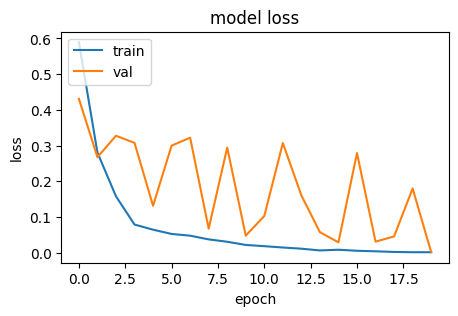

In [547]:
from  matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

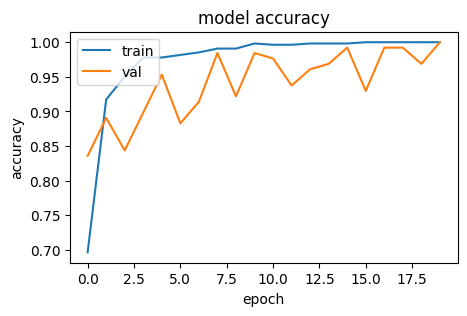

In [548]:
plt.figure(figsize=(5,3))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [549]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 335]
 [  1 384]]


#Test a model 

In [550]:
X_test_ = []
y_test_ = []

from numpy.lib.stride_tricks import sliding_window_view

for sample_idx, point_cloud in enumerate(test_points):
  print("\nCurrent: ", sample_idx, point_cloud.shape)
  
  N = point_cloud.shape[0]
  max_window = N-WINDOW_SIZE+1
  window_x = [point_cloud[i:i+WINDOW_SIZE] for i in range(max_window)]
  window_x = np.array(window_x)[::PADDING]

  y_test_.append(np.full((window_x.shape[0]), test_labels[sample_idx]))
  print(window_x.shape)
  X_test_.append(window_x)

y_test = np.concatenate(y_test_)
y_test = np.expand_dims(y_test, axis=1)
X_test = np.concatenate(X_test_)
print("\n", X_test.shape)
print(y_test.shape)

TEST_SAMPLES = X_test.shape[0]

shuffled_test_indices = np.random.choice(TEST_SAMPLES, TEST_SAMPLES, replace=False) # (range, size, replace*)
X_test = X_test[shuffled_test_indices]
y_test = y_test[shuffled_test_indices]


Current:  0 (871, 39, 3)
(43, 20, 39, 3)

Current:  1 (803, 39, 3)
(40, 20, 39, 3)

Current:  2 (937, 39, 3)
(46, 20, 39, 3)

Current:  3 (3677, 39, 3)
(183, 20, 39, 3)

 (312, 20, 39, 3)
(312, 1)


In [551]:
y_pred = model.predict(X_test, batch_size=32, verbose=1)

10/10 [==============================] - 1s 49ms/step


In [552]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, np.argmax(y_pred, axis = 1)).ravel()
print("FP: ", fp)
print("FN: ", fn)
print("\n _____ \n")
print("TP: ", tp)
print("TN: ", tn)

FP:  0
FN:  0

 _____ 

TP:  183
TN:  129


In [553]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 129]
 [  1 183]]


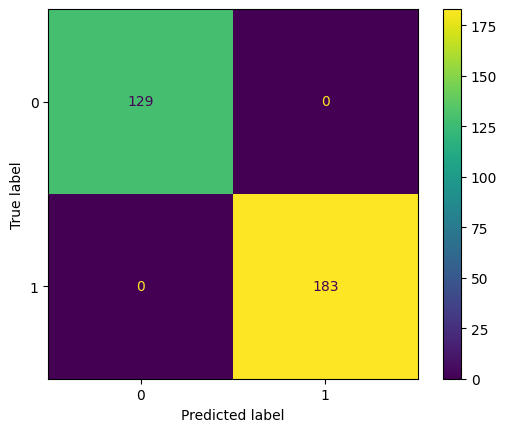

In [554]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, np.argmax(y_pred, axis = 1))
cm_display = ConfusionMatrixDisplay(cm).plot()